<a href="https://colab.research.google.com/github/abhishhari/Research-Project/blob/main/lightphase_darkphase_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install scikit-posthocs
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from datetime import datetime
from scipy import stats
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import powerlaw

In [ ]:
# Read data for all four groups
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group10 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group10.csv')
group20 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group20.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

In [ ]:
# Print summary statistics for each group
print('Group 0 summary statistics:')
print(group0.describe())
print('\n')
print('Group 10 summary statistics:')
print(group10.describe())
print('\n')
print('Group 20 summary statistics:')
print(group20.describe())
print('\n')
print('Group 50 summary statistics:')
print(group50.describe())

Group 0 summary statistics:
         Interval      X Total  X Ambulatory     Z Total
count  470.000000   470.000000    470.000000  470.000000
mean    65.425532   199.327660     54.040426   22.825532
std     41.268813   215.083935     80.096480   53.291364
min      1.000000     0.000000      0.000000    0.000000
25%     16.000000    44.000000      5.250000    0.000000
50%     85.000000   119.000000     20.000000    0.000000
75%    100.000000   275.750000     71.000000   20.000000
max    115.000000  1050.000000    548.000000  505.000000


Group 10 summary statistics:
         Interval      X Total  X Ambulatory     Z Total
count  460.000000   460.000000    460.000000  460.000000
mean    63.500000   219.608696     57.265217   24.393478
std     41.627642   213.902873     75.629467   53.507065
min      1.000000     0.000000      0.000000    0.000000
25%     15.000000    54.000000      6.000000    0.000000
50%     84.000000   140.000000     27.000000    0.000000
75%     99.000000   346.25000

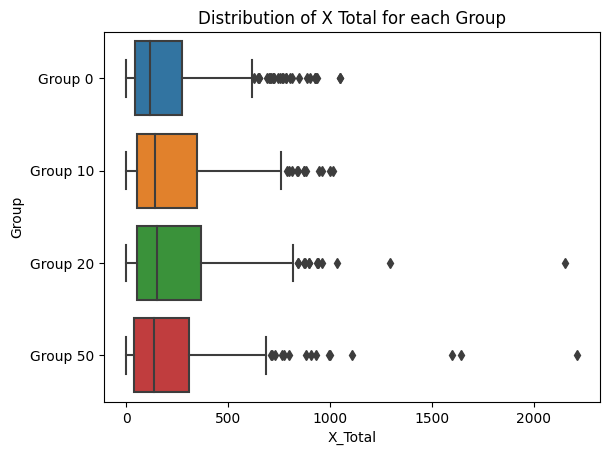

In [ ]:
# Create a box plot to compare the distributions of each group
sns.boxplot(data=[group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']], orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel('X_Total')
plt.title('Distribution of X Total for each Group')
plt.show()

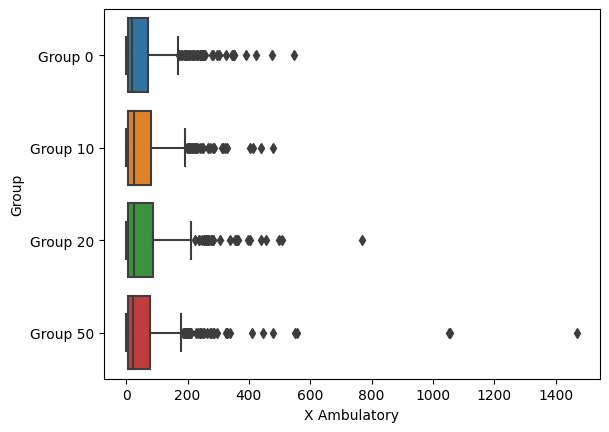

In [ ]:
# Create a box plot to compare the distributions of each group
sns.boxplot(data=[group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory']],orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel('X Ambulatory')
plt.show()

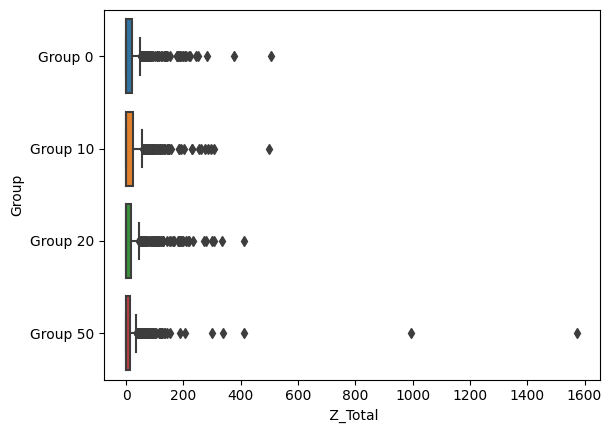

In [ ]:
# Create a box plot to compare the distributions of each group
sns.boxplot(data=[group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']],orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel(' Z_Total')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


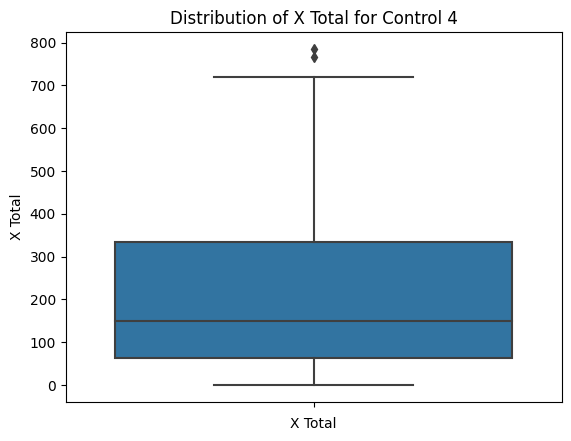

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group 0/control4.csv")

# Select the X_Total column
x_total = df['X Total']

# Create a horizontal box plot of the data
sns.boxplot(y=x_total,orient="v")
plt.xlabel('X Total')
plt.title('Distribution of X Total for Control 4')
plt.show()



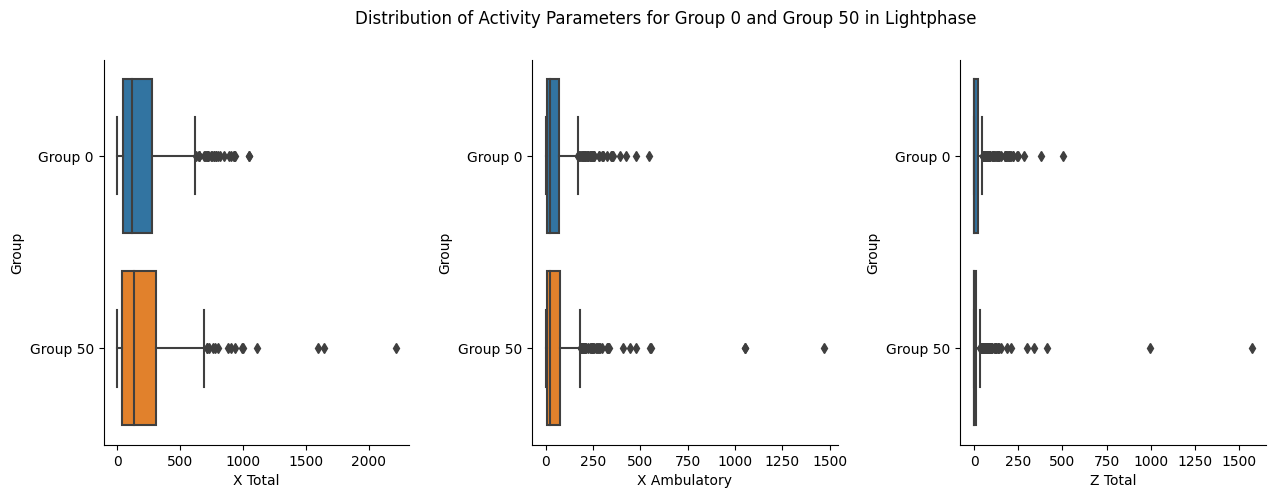

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for Group 0 and Group 50 from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')



# Create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot X_Total for Group 0 and Group 50 on the first subplot
sns.boxplot(y='Group', x='X Total', data=pd.concat([group0.assign(Group='Group 0'), group50.assign(Group='Group 50')]), ax=axs[0])


# Plot X_Ambulatory for Group 0 and Group 50 on the second subplot
sns.boxplot(y='Group', x='X Ambulatory', data=pd.concat([group0.assign(Group='Group 0'), group50.assign(Group='Group 50')]), ax=axs[1])


# Plot Z_Total for Group 0 and Group 50 on the third subplot
sns.boxplot(y='Group', x='Z Total', data=pd.concat([group0.assign(Group='Group 0'), group50.assign(Group='Group 50')]), ax=axs[2])


# Set the overall title for the figure
fig.suptitle('Distribution of Activity Parameters for Group 0 and Group 50 in Lightphase')

#Remove the redundant external boxes and titles
sns.despine()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


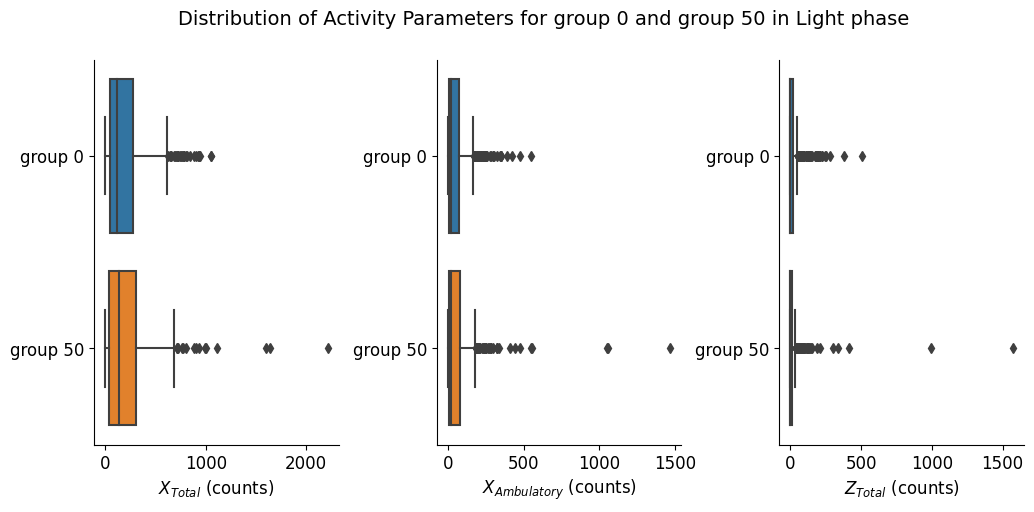

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for Group 0 and Group 50 from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Plot X_Total for Group 0 and Group 50 on the first subplot
sns.boxplot(y='Group', x='X Total', data=pd.concat([group0.assign(Group='group 0'), group50.assign(Group='group 50')]), ax=axs[0])

axs[0].set_xlabel(r'$X_{Total}$ (counts)', fontsize=12)
axs[0].set_ylabel('')
axs[0].tick_params(labelsize=12)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot X_Ambulatory for Group 0 and Group 50 on the second subplot
sns.boxplot(y='Group', x='X Ambulatory', data=pd.concat([group0.assign(Group='group 0'), group50.assign(Group='group 50')]), ax=axs[1])
axs[1].set_xlabel(r'$X_{Ambulatory}$ (counts)', fontsize=12)

axs[1].set_ylabel('')
axs[1].tick_params(labelsize=12)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Plot Z_Total for Group 0 and Group 50 on the third subplot
sns.boxplot(y='Group', x='Z Total', data=pd.concat([group0.assign(Group='group 0'), group50.assign(Group='group 50')]), ax=axs[2])
axs[2].set_xlabel(r'$Z_{Total}$ (counts)', fontsize=12)

axs[2].set_ylabel('')
axs[2].tick_params(labelsize=12)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Set the overall title for the figure
fig.suptitle('Distribution of Activity Parameters for group 0 and group 50 in Light phase', fontsize=14)
#Remove the redundant external boxes and titles
sns.despine()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [ ]:
# Combine the data from all groups into a single array
data = np.concatenate([group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']])

In [ ]:
# Combine the data from all groups into a single array
data = np.concatenate([group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory']])

In [ ]:
# Combine the data from all groups into a single array
data = np.concatenate([group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']])

In [ ]:
# Create an array of group labels
groups = ['Group 0'] * len(group0) + ['Group 10'] * len(group10) + ['Group 20'] * len(group20) + ['Group 50'] * len(group50)

In [ ]:
# Perform the Kruskal-Wallis test
stat, p = kruskal(group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total'])

In [ ]:
# Perform the Kruskal-Wallis test
stat1, p1 = kruskal(group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory'])

In [ ]:
# Perform the Kruskal-Wallis test
stat2, p2 = kruskal(group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total'])

In [ ]:
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat}')
print(f'p-value: {p}')

Kruskal-Wallis test
-------------------
Statistic: 9.42108535133417
p-value: 0.024185869899857097


In [ ]:
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat1}')
print(f'p-value: {p1}')

Kruskal-Wallis test
-------------------
Statistic: 4.663009695684659
p-value: 0.19820296542011503


In [ ]:
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat2}')
print(f'p-value: {p2}')

Kruskal-Wallis test
-------------------
Statistic: 10.075381061662087
p-value: 0.017936117777229553


In [ ]:
# Concatenate all groups into a single dataframe
df = pd.concat([group0, group10, group20, group50])

In [ ]:
# Add a column for group membership
df['group'] = ['group0'] * len(group0) + ['group10'] * len(group10) + ['group20'] * len(group20) + ['group50'] * len(group50)

           group0   group10   group20   group50
group0   1.000000  0.333057  0.040380  1.000000
group10  0.333057  1.000000  1.000000  0.979828
group20  0.040380  1.000000  1.000000  0.161405
group50  1.000000  0.979828  0.161405  1.000000


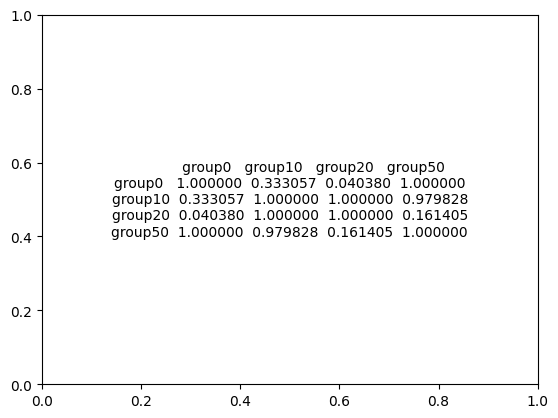

In [ ]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='X Total', group_col='group', p_adjust='bonferroni')
print(posthoc)
# Add text to the plot
text =  str(posthoc)
plt.text(0.5, 0.5, text, ha='center', va='center')
posthoc.to_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/posthoc_dunn.csv')


In [ ]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='X Ambulatory', group_col='group', p_adjust='bonferroni')
print(posthoc)

           group0   group10   group20  group50
group0   1.000000  0.642456  0.314578      1.0
group10  0.642456  1.000000  1.000000      1.0
group20  0.314578  1.000000  1.000000      1.0
group50  1.000000  1.000000  1.000000      1.0


In [ ]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='Z_Total', group_col='group', p_adjust='bonferroni')
print(posthoc)

           group0   group10   group20   group50
group0   1.000000  1.000000  1.000000  0.356323
group10  1.000000  1.000000  0.894659  0.010798
group20  1.000000  0.894659  1.000000  0.447209
group50  0.356323  0.010798  0.447209  1.000000


In [ ]:
import pandas as pd
from scipy.stats import anderson

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# perform Anderson-Darling test on Group0 data
result0 = anderson(group0['X Total']) # replace 'column_name' with the name of the column you want to test

# print the test statistic and critical values for Group0
print('Group0 Anderson-Darling test statistic:', result0.statistic)
print('Group0 Critical values:', result0.critical_values)

# interpret the test result for Group0
sig_level = [0.15, 0.1, 0.05, 0.025, 0.01]
for i, sl in enumerate(sig_level):
    if result0.statistic > result0.critical_values[i]:
        print('At significance level =', sl, ', reject the null hypothesis that Group0 data is normally distributed.')
    else:
        print('At significance level =', sl, ', fail to reject the null hypothesis that Group0 data is normally distributed.')

# perform Anderson-Darling test on Group50 data
result50 = anderson(group50['X Total']) # replace 'column_name' with the name of the column you want to test

# print the test statistic and critical values for Group50
print('Group50 Anderson-Darling test statistic:', result50.statistic)
print('Group50 Critical values:', result50.critical_values)

# interpret the test result for Group50
sig_level = [0.15, 0.1, 0.05, 0.025, 0.01]
for i, sl in enumerate(sig_level):
    if result50.statistic > result50.critical_values[i]:
        print('At significance level =', sl, ', reject the null hypothesis that Group50 data is normally distributed.')
    else:
        print('At significance level =', sl, ', fail to reject the null hypothesis that Group50 data is normally distributed.')


Group0 Anderson-Darling test statistic: 29.14219268917907
Group0 Critical values: [0.571 0.651 0.78  0.91  1.083]
At significance level = 0.15 , reject the null hypothesis that Group0 data is normally distributed.
At significance level = 0.1 , reject the null hypothesis that Group0 data is normally distributed.
At significance level = 0.05 , reject the null hypothesis that Group0 data is normally distributed.
At significance level = 0.025 , reject the null hypothesis that Group0 data is normally distributed.
At significance level = 0.01 , reject the null hypothesis that Group0 data is normally distributed.
Group50 Anderson-Darling test statistic: 26.689847456096004
Group50 Critical values: [0.572 0.652 0.782 0.912 1.085]
At significance level = 0.15 , reject the null hypothesis that Group50 data is normally distributed.
At significance level = 0.1 , reject the null hypothesis that Group50 data is normally distributed.
At significance level = 0.05 , reject the null hypothesis that Group

In [ ]:
import pandas as pd
from scipy.stats import anderson

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# define significance levels
sig_levels = [0.15, 0.10, 0.05, 0.025, 0.01]

# define a function to perform Anderson-Darling test and return test statistic and p-value
def anderson_test(data):
    result = anderson(data)
    return result.statistic, result.critical_values, result.significance_level

# perform Anderson-Darling test on Group0 data and store the result in a list of tuples
result_list = [('Group0', *anderson_test(group0['X Total']))]

# perform Anderson-Darling test on Group50 data and append the result to the list of tuples
result_list.append(('Group50', *anderson_test(group50['X Total'])))

# create a DataFrame to store the test result
result_df = pd.DataFrame(result_list, columns=['Group', 'Test statistic', 'Critical values', 'Significance levels'])

# add p-values to the DataFrame
p_values = [(1 - sl) for sl in result_df['Significance levels']]
result_df['p-values'] = p_values

# print the DataFrame
print(result_df)
result_df.to_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/anderson_result.csv', index=False)

     Group  Test statistic                      Critical values  \
0   Group0       29.142193    [0.571, 0.651, 0.78, 0.91, 1.083]   
1  Group50       26.689847  [0.572, 0.652, 0.782, 0.912, 1.085]   

           Significance levels                        p-values  
0  [15.0, 10.0, 5.0, 2.5, 1.0]  [-14.0, -9.0, -4.0, -1.5, 0.0]  
1  [15.0, 10.0, 5.0, 2.5, 1.0]  [-14.0, -9.0, -4.0, -1.5, 0.0]  


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group10.csv')

# perform two-sample t-test on the specified columns of each group's dataframe
result = ttest_ind(group0['X Total'], group50['X Total']) # replace 'column_name' with the name of the column you want to test

# print the test statistic and p-value
print('t-test statistic:', result.statistic)
print('p-value:', result.pvalue)

# interpret the test result
alpha = 0.05
if result.pvalue < alpha:
    print('Reject the null hypothesis that the means of two groups are equal.')
else:
    print('Fail to reject the null hypothesis that the means of two groups are equal.')


t-test statistic: -1.4416108301137371
p-value: 0.1497495506675088
Fail to reject the null hypothesis that the means of two groups are equal.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# perform two-sample t-test on the specified columns of each group's dataframe
result_X = ttest_ind(group0['X Total'], group50['X Total'])
result_Z = ttest_ind(group0['Z Total'], group50['Z Total'])

# print the test statistic and p-value
print('t-test statistic for X Total:', result_X.statistic)
print('p-value for X Total:', result_X.pvalue)

print('t-test statistic for Z Total:', result_Z.statistic)
print('p-value for Z Total:', result_Z.pvalue)

# interpret the test result
alpha = 0.05
if result_X.pvalue < alpha:
    print('Reject the null hypothesis that the means of two groups are equal for X Total.')
else:
    print('Fail to reject the null hypothesis that the means of two groups are equal for X Total.')
    
if result_Z.pvalue < alpha:
    print('Reject the null hypothesis that the means of two groups are equal for Z Total.')
else:
    print('Fail to reject the null hypothesis that the means of two groups are equal for Z Total.')


t-test statistic for X Total: -0.4628201187620385
p-value for X Total: 0.6435882149965898
t-test statistic for Z Total: 0.7181712023678347
p-value for Z Total: 0.47280983805044485
Fail to reject the null hypothesis that the means of two groups are equal for X Total.
Fail to reject the null hypothesis that the means of two groups are equal for Z Total.


In [ ]:
import pandas as pd
from statsmodels.stats.stattools import durbin_watson

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group10 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group10.csv')
group20 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group20.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# perform Durbin-Watson test on XTotal and ZTotal data for each group
groups = [("Group 0", group0), ("Group 10", group10), ("Group 20", group20), ("Group 50", group50)]
for name, group in groups:
    XTotal_result = durbin_watson(group['X Total'])
    ZTotal_result = durbin_watson(group['Z Total'])
    
    print(f"{name} Durbin-Watson test statistic for XTotal: {XTotal_result:.2f}")
    print(f"{name} Durbin-Watson test statistic for ZTotal: {ZTotal_result:.2f}")
    
    # interpret the test results
    if XTotal_result < 2:
        print(f"{name} X Total has positive autocorrelation.")
    else:
        print(f"{name} X Total does not have positive autocorrelation.")
    
    if ZTotal_result < 2:
        print(f"{name} Z Total has positive autocorrelation.")
    else:
        print(f"{name} Z Total does not have positive autocorrelation.")



Group 0 Durbin-Watson test statistic for XTotal: 0.67
Group 0 Durbin-Watson test statistic for ZTotal: 1.52
Group 0 X Total has positive autocorrelation.
Group 0 Z Total has positive autocorrelation.
Group 10 Durbin-Watson test statistic for XTotal: 0.60
Group 10 Durbin-Watson test statistic for ZTotal: 1.37
Group 10 X Total has positive autocorrelation.
Group 10 Z Total has positive autocorrelation.
Group 20 Durbin-Watson test statistic for XTotal: 0.66
Group 20 Durbin-Watson test statistic for ZTotal: 1.39
Group 20 X Total has positive autocorrelation.
Group 20 Z Total has positive autocorrelation.
Group 50 Durbin-Watson test statistic for XTotal: 0.71
Group 50 Durbin-Watson test statistic for ZTotal: 1.10
Group 50 X Total has positive autocorrelation.
Group 50 Z Total has positive autocorrelation.


In [ ]:
import pandas as pd
from statsmodels.stats.stattools import durbin_watson

# read data from CSV files
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group0.csv')
group10 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group10.csv')
group20 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group20.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group50.csv')

# perform Durbin-Watson test on XTotal and ZTotal data for each group
groups = [("Group 0", group0), ("Group 10", group10), ("Group 20", group20), ("Group 50", group50)]
results = []
for name, group in groups:
    XTotal_result = durbin_watson(group['X Total'])
    X_Ambulatory_result = durbin_watson(group['X Ambulatory'])
    ZTotal_result = durbin_watson(group['Z Total'])
    
    # interpret the test results
    XTotal_autocorr = "positive" if XTotal_result < 2 else "not positive"
    X_Ambulatory_autocorr = "positive" if XTotal_result < 2 else "not positive"
    ZTotal_autocorr = "positive" if ZTotal_result < 2 else "not positive"
    
    results.append({
        'Group': name,
        'XTotal DW test statistic': XTotal_result,
        'XTotal autocorrelation': XTotal_autocorr,
        'XAmbulatory DW test statistic': X_Ambulatory_result,
        'XAmbulatory autocorrelation': X_Ambulatory_autocorr,
        'ZTotal DW test statistic': ZTotal_result,
        'ZTotal autocorrelation': ZTotal_autocorr
    })

# create a DataFrame to store the test results
results_df = pd.DataFrame(results)

# save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/durbin_watson_results.csv', index=False)


In [ ]:
# Convert 'Date/Time' column to datetime format and set it as the index
group0['Date/Time'] = pd.to_datetime(group0['Date/Time'])
group0.set_index('Date/Time', inplace=True)

group10['Date/Time'] = pd.to_datetime(group10['Date/Time'])
group10.set_index('Date/Time', inplace=True)

group20['Date/Time'] = pd.to_datetime(group20['Date/Time'])
group20.set_index('Date/Time', inplace=True)

group50['Date/Time'] = pd.to_datetime(group50['Date/Time'])
group50.set_index('Date/Time', inplace=True)

In [ ]:
# Select the columns with the data you want to analyze
x_cols = ['X_Total']
z_cols = ['Z_Total']

In [ ]:
# Specify a maximum value manually
xmax = 2500.

Slope for Group 0: 0.16440150742979875


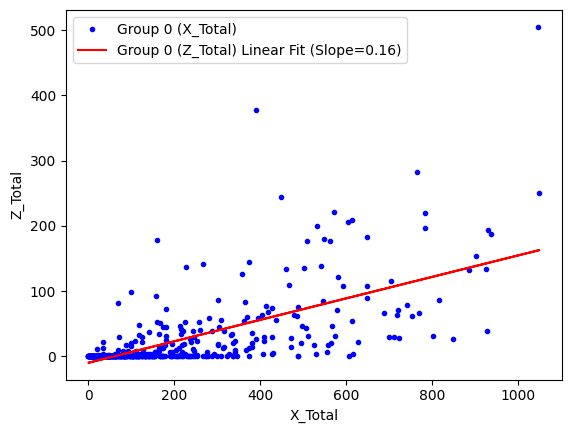

Slope for Group 10: 0.14638463604431934


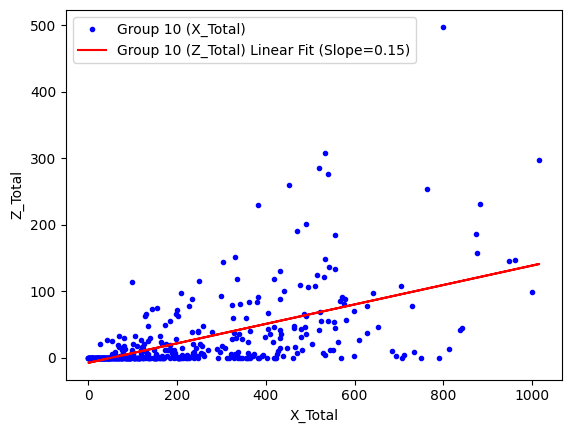

Slope for Group 20: 0.11651630884234476


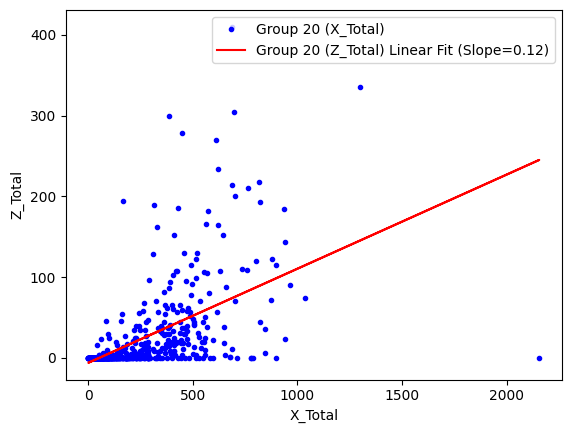

Slope for Group 50: 0.24447032156429893


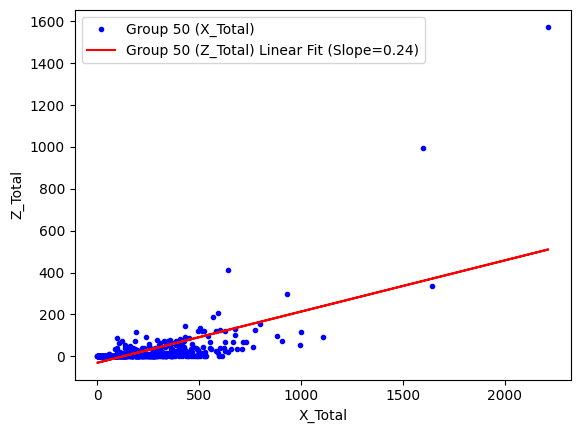

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define X and Z total for each group
x_total = [group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']]
z_total = [group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']]

# Define colors for each variable
x_color = 'blue'
z_color = 'red'

# Define labels for the plot
labels = ['Group 0', 'Group 10', 'Group 20', 'Group 50']

# Define the linear function to fit the data
def linear(x, m, b):
    return m * x + b

# Define the negative log-likelihood function for the linear fit
def neg_log_likelihood(params, x, y):
    m, b = params
    y_pred = linear(x, m, b)
    sigma2 = np.var(y - y_pred)
    return 0.5 * len(y) * np.log(2 * np.pi * sigma2) + 0.5 * np.sum((y - y_pred)**2) / sigma2


# Fit the data for each group
for i in range(len(x_total)):
    x = x_total[i]
    y = z_total[i]
    initial_guess = [0, 0] # initial guess for m and b
    result = minimize(neg_log_likelihood, initial_guess, args=(x, y))
    m, b = result.x
    print(f"Slope for {labels[i]}: {m}")
    
    # Plot the data with the linear fit
    fig, ax = plt.subplots()
    ax.plot(x, y, '.', color='blue', label=f'{labels[i]} (X_Total)')
    ax.plot(x, linear(x, m, b), '-', color='red', label=f"{labels[i]} (Z_Total) Linear Fit (Slope={m:.2f})")
    ax.legend()
    ax.set_xlabel('X_Total')
    ax.set_ylabel('Z_Total')
    plt.show()

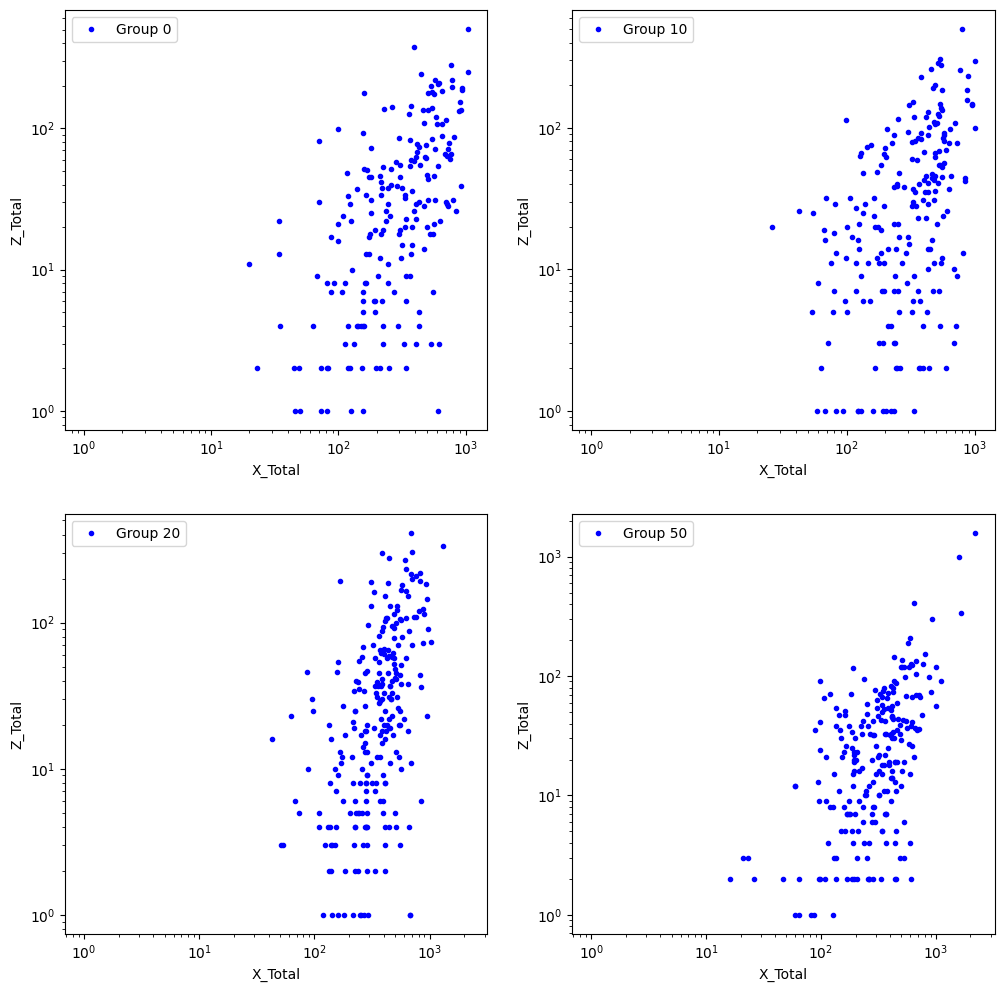

In [ ]:
import matplotlib.pyplot as plt

# Define X and Z total for each group
x_total = [group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']]
z_total = [group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']]

# Define colors for each group
colors = ['blue', 'blue', 'blue', 'blue']

# Define labels for the plot
labels = ['Group 0', 'Group 10', 'Group 20', 'Group 50']

# Plot X Total on the x-axis and Z Total on the y-axis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    ax.loglog(x_total[i], z_total[i], '.', color=colors[i], label=labels[i])
    ax.set_xlabel('X_Total')
    ax.set_ylabel('Z_Total')
    ax.legend()

plt.show()
